**Importamos las librerías necesarias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos nuestra base de datos. Se transforma la variable 'Fecha' a datetime para evitar problemas de visualización:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cpizarrov/proyecto_final/main/covid_global_02.csv")
df['fecha'] = pd.to_datetime(df['fecha'])

Supongamos alguna institución, como el Ministerio de Salud, nos haya solicitado analizar las tendencias mundiales del coronavirus, esto con el fin de comparar las diferentes políticas sanitarias que los países adoptaron durante los años 2019 y 2023 y, así, evaluar la adopción de posibles medidas a nivel nacional. Adicionalmente, se nos ha solicitado levantar un tablero de visualización interactivo de estos datos para facilitar el acceso a dicha información.

Es así como podemos comenzar nuestro análisis con una primera vista de los países más afectados, ya sea por volumen de casos confirmados y por volumen de muertes: 

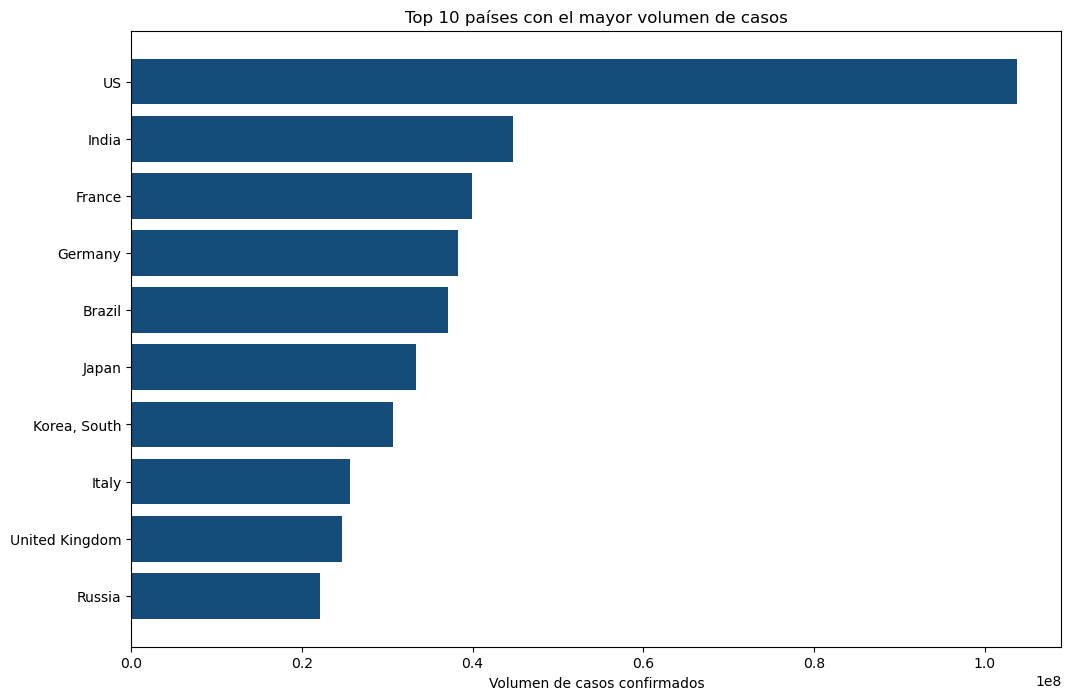

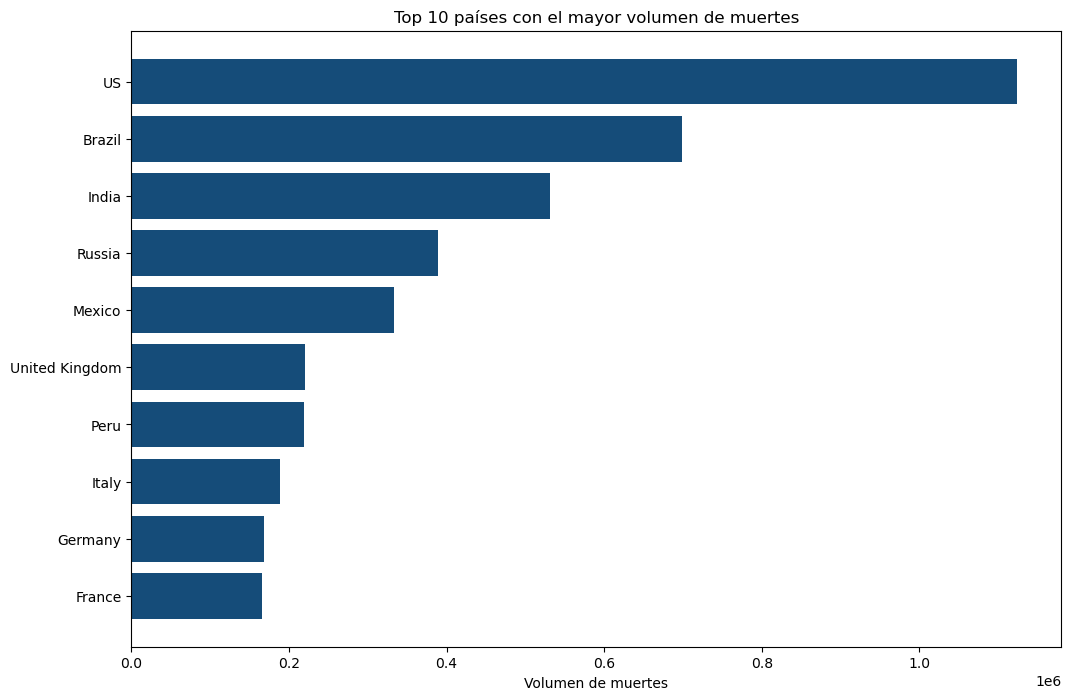

In [3]:
data_pais = df.groupby('pais').agg({'confirmados_acumulados': 'max', 'muertes_acumuladas': 'max'}).reset_index()
mas_afectados_confirmados = data_pais.sort_values(by='confirmados_acumulados', ascending=False).head(10)
mas_afectados_muertes = data_pais.sort_values(by='muertes_acumuladas', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(mas_afectados_confirmados['pais'], mas_afectados_confirmados['confirmados_acumulados'], color='#154c79')
plt.xlabel('Volumen de casos confirmados')
plt.title('Top 10 países con el mayor volumen de casos')
plt.gca().invert_yaxis()

plt.figure(figsize=(12, 8))
plt.barh(mas_afectados_muertes['pais'], mas_afectados_muertes['muertes_acumuladas'], color='#154c79')
plt.xlabel('Volumen de muertes')
plt.title('Top 10 países con el mayor volumen de muertes')
plt.gca().invert_yaxis()

plt.show()

Al observar estos dos gráficos, nos damos cuenta que existen países fuertemente afectados en ambos volúmenes, tales como Estados Unidos, Brasil, Reino Unido y Corea del Sur. 

Sin embargo, esta información sólo nos muestra un retrato parcial de la realidad, dado que éstos volúmenes pueden encontrarse mucho más relacionados a la cantidad de habitantes de un país en lugar de las medidas adoptadas por éstos. Por lo que debemos ser precavidos y comenzar a observar las distribuciones de los diferentes casos. Veamos por ejemplo, cómo distribuyen las muertes y recuperados en los países con el mayor volumen de casos confirmados:

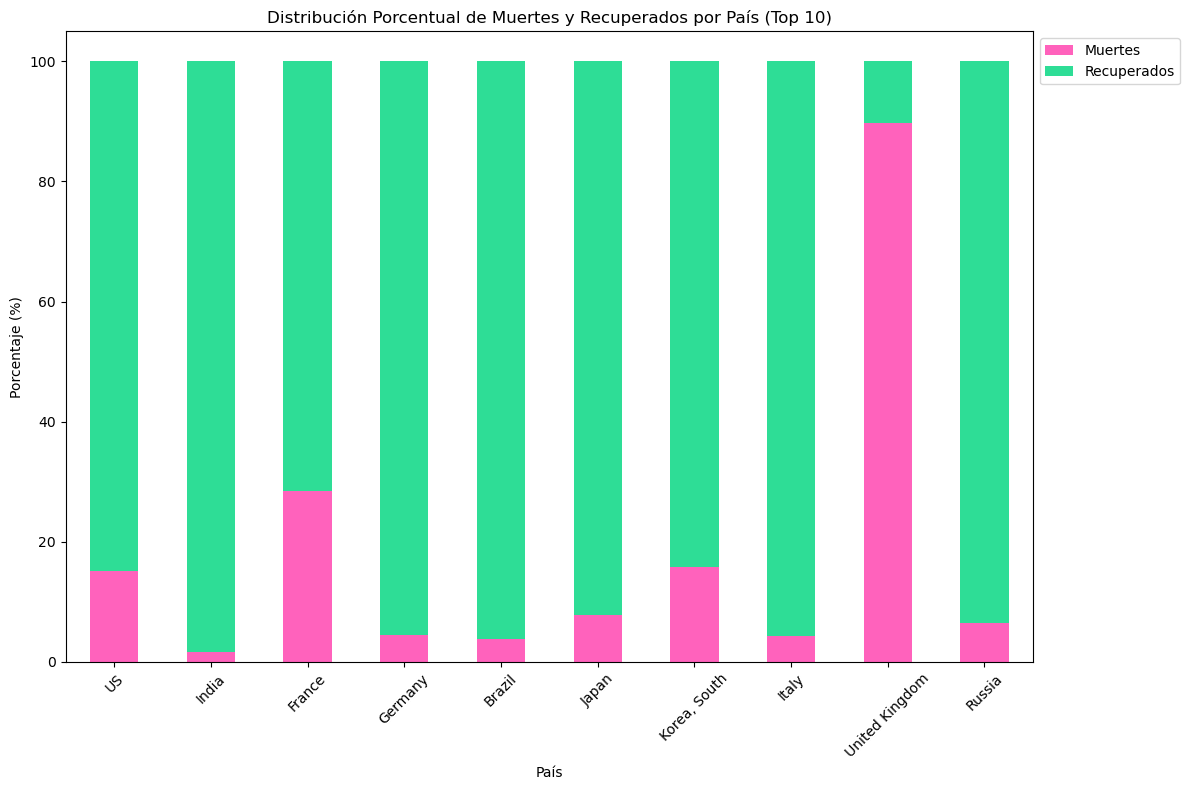

In [4]:
data_pais_02 = df.groupby('pais').agg({'confirmados_acumulados': 'max','muertes_acumuladas': 'max','recuperados_acumulados': 'max'
}).reset_index()

mas_afectados_confirmados_02 = data_pais_02.sort_values(by='confirmados_acumulados', ascending=False).head(10)

mas_afectados_confirmados_02['muertes_y_recuperados'] = mas_afectados_confirmados_02['muertes_acumuladas'] + mas_afectados_confirmados_02['recuperados_acumulados']
mas_afectados_confirmados_02['porcentaje_muertes'] = mas_afectados_confirmados_02['muertes_acumuladas'] / mas_afectados_confirmados_02['muertes_y_recuperados'] * 100
mas_afectados_confirmados_02['porcentaje_recuperados'] = mas_afectados_confirmados_02['recuperados_acumulados'] / mas_afectados_confirmados_02['muertes_y_recuperados'] * 100

mas_afectados_confirmados_02 = mas_afectados_confirmados_02.set_index('pais')
datos_apilados = mas_afectados_confirmados_02[['porcentaje_muertes', 'porcentaje_recuperados']]

ax = datos_apilados.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#ff62bc', '#2edd96'])

plt.title('Distribución Porcentual de Muertes y Recuperados por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Porcentaje (%)')
plt.legend(['Muertes', 'Recuperados'], loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Estos resultados nos dan a entender que no podemos quedarnos sólo con los grandes volúmenes. Por un lado, tenemos países como Reino Unido y Francia donde podemos observar un gran porcentaje de fallecidos en contraste a los recuperados. Sin embargo, en países como India y Alemania, existe una proporción mucho menor de ello, lo que podría ser resultado de una mejor infraestructura y capacidad hospitalaria. 

- [Sin embargo, el caso de India en realidad es preocupante, ya que la OMS advierte que los datos oficialmente reconocidos no coinciden con la realidad.](https://www.bbc.com/mundo/noticias-61333739#:~:text=El%20pa%C3%ADs%20en%20el%20que,covid%20en%20todo%20el%20mundo.) Realmente esto podría haber sido un argumento para omitir este país en una etapa previa. 

Por la razón descrita anteriormente, debemos preguntarnos ¿Cuál medida es más útil para comparar y definir los países más exitosos en el manejo de la pandemia? Pues, la más acorde sería la tasa de **'Letalidad'**. Por lo cual, lo primero que podríamos es identificar a los países con el menor índice de letalidad además de sus tendencias en una serie temporal para así obtener referencias de posibles medidas que fueron adoptadas durante un período específico.

- Tal y como mencionamos anteriormente, no es óptimo generar variables como 'Letalidad' con antelación, ya que al momento de realizar agrupaciones tenemos que calcular nuevamente la variable.

In [5]:
data_pais = df.groupby('pais').agg({'confirmados_acumulados': 'max', 'muertes_acumuladas': 'max'}).reset_index()
data_pais['letalidad'] = data_pais['muertes_acumuladas'] / data_pais['confirmados_acumulados'] * 100
casos_exito = data_pais.sort_values(by='letalidad').head(10)

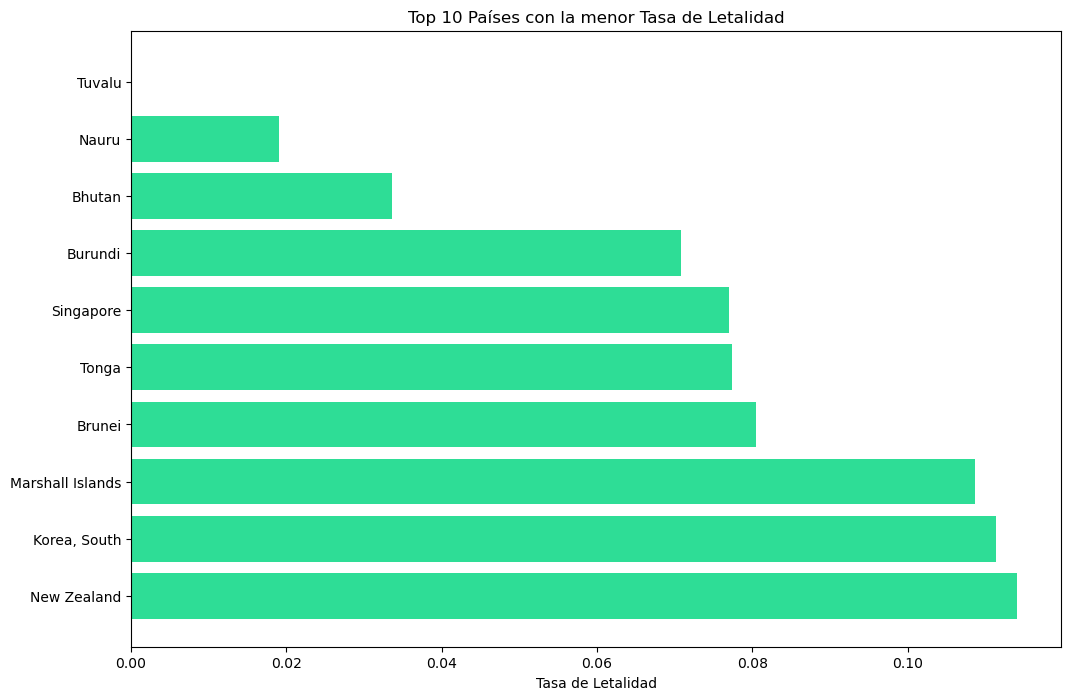

In [6]:
plt.figure(figsize=(12, 8))
plt.barh(casos_exito['pais'], casos_exito['letalidad'], color='#2edd96')
plt.xlabel('Tasa de Letalidad')
plt.title('Top 10 Países con la menor Tasa de Letalidad')
plt.gca().invert_yaxis()
plt.show()

Al mismo tiempo podríamos preguntarnos, ¿A cuáles les fue peor?: 

In [7]:
casos_fracaso = data_pais.sort_values(by='letalidad', ascending=False).head(10)

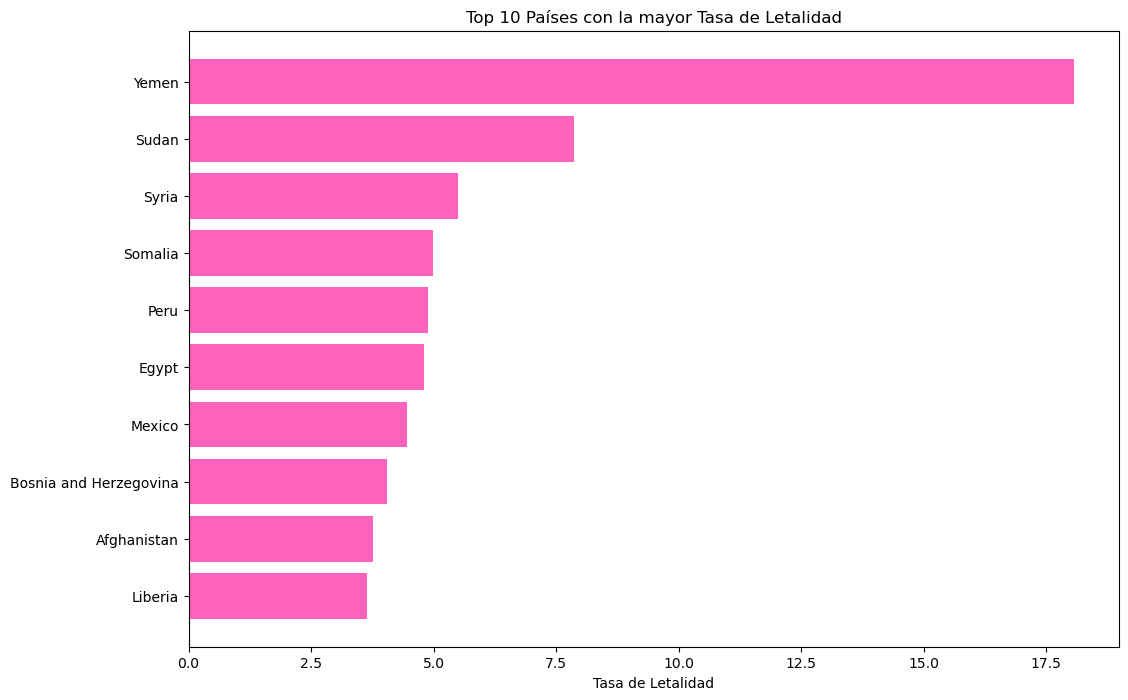

In [8]:
plt.figure(figsize=(12, 8))
plt.barh(casos_fracaso['pais'], casos_fracaso['letalidad'], color='#ff62bc')
plt.xlabel('Tasa de Letalidad')
plt.title('Top 10 Países con la mayor Tasa de Letalidad')
plt.gca().invert_yaxis()
plt.show()

Ésta métrica nos resulta mucho más valiosa para comprender cuáles países han logrado estabilizar su situación y realizar comparaciones entre ellos. Por ejemplo, Corea del Sur era uno de los países más afectados en volumen de confirmados, y al mismo tiempo es de los que posee el menor índice de letalidad. 

Sin embargo, disponer de un top no es suficiente para extraer información concluyente (existen países en el top que se componen de islas en oceanía y su condición geográfica les favorece). Por este motivo, hay dos cosas que podríamos hacer para disponibilizar información más relevante: 

- Un gráfico de serie temporal que nos permita observar la evolución de la letalidad a lo largo del tiempo. De este modo, podemos obtener referencias sobre los momentos donde los países han mejorado (o empeorado) su situación y comparar esta información con las medidas adoptadas por ellos. 



- Un selector interactivo de países, con el fin de que el analista pueda seleccionar países cuyas condiciones sean más comparables con la realidad nacional (no es útil compararnos, por ejemplo, con Nauru). 


A continuación, el siguiente gráfico nos permitirá ir añadiendo países para su comparación: 